In [1]:
from qutip import*
import numpy as np
import matplotlib.pyplot as plt
from math import*
from numpy.polynomial import polynomial as P
from mpl_toolkits.mplot3d.axes3d import mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

In [2]:
N=50
ec=1.6e-19
h=(6.62e-34)/2*np.pi
w_c=2*np.pi*1.5*ec/(6.62e-34)
w_a=2*np.pi*1.5*ec/(6.62e-34)
w_p=2*np.pi*1.5*ec/(6.62e-34)
g=(0.1*2*np.pi*(ec*1e-3)/(6.62e-34))
kappa=0.0085e-12/h
gamma=0.001e-12/h
alpha=0.5*np.pi
t_drive=np.array([0.1e-12,1.42e-11,2.41e-11,3.46e-11,4e-11,4.65e-11,5.37e-11,6.07e-11,6.72e-11,7.21e-11])
#print(t_drive)
sig=1e-13/2.355 
#print(sig)
tlist=[]

t=0.0

while t<=80:
    #o=round(t,)
    o=round(t,2)
    o=o*(1e-12)
    tlist.append(float("%.14f"%o))
    t=t+0.1
tlist=np.array(tlist)



In [3]:
sm=tensor(qeye(N),destroy(2))
a=tensor(destroy(N),qeye(2))
phi_c=fock(N,0)#state related to cavity field
phi_a=fock(2,0)#state related to dot
phi1=tensor(phi_c,phi_a)

No=1/(np.sqrt(2*(1+np.exp(-((np.pi)**2)/4))))
phi_expected=No*(coherent(N,alpha)+coherent(N,-alpha))
rho1=ket2dm(phi_expected)


In [4]:
n_the_exc=0
c_ops=[]

#cavity relaxation
rate=kappa*(1+n_the_exc)
if rate>0:
    c_ops.append(np.sqrt(rate)*a)

#cavity excitation if temperature is >0
rate=kappa*n_the_exc
if rate>0:
    c_ops.append(np.sqrt(rate)*a.dag())
    
#qubuit relaxation
rate=gamma
if rate>0:
    c_ops.append(np.sqrt(rate)*sm)

In [5]:
def d_drive(tlist,args):
  
    f=0  
    s=0
    p=0
   
    if tlist<=((t_drive[0]+t_drive[1])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[0])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[0]))
        
        
    if tlist<=((t_drive[1]+t_drive[2])/2) and tlist>((t_drive[0]+t_drive[1])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[1])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[1]))
        
        
        
    if tlist<=((t_drive[2]+t_drive[3])/2) and tlist>((t_drive[1]+t_drive[2])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[2])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[2]))
        
        
    if tlist<=((t_drive[3]+t_drive[4])/2) and tlist>((t_drive[2]+t_drive[3])/2):
        f=(((np.pi*np.exp(-(tlist-t_drive[3])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[3]))
        
        
    if tlist<=((t_drive[4]+t_drive[5])/2) and tlist>((t_drive[3]+t_drive[4])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[4])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[4]))
        
    if tlist<=((t_drive[5]+t_drive[6])/2) and tlist>((t_drive[4]+t_drive[5])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[5])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[5]))
        
        
    if tlist<=((t_drive[6]+t_drive[7])/2) and tlist>((t_drive[5]+t_drive[6])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[6])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[6]))
        
        
    if tlist<=((t_drive[7]+t_drive[8])/2) and tlist>((t_drive[6]+t_drive[7])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[7])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[7]))

        
    if tlist<=((t_drive[8]+t_drive[9])/2) and tlist>((t_drive[7]+t_drive[8])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[8])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[8]))
      
        
    if tlist>=((t_drive[8]+t_drive[9])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[9])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[9]))
  
        
    #print(s)
    return f

In [9]:
def d1_drive(tlist,args):

    f=0  
    s=0
    p=0

    if tlist<=((t_drive[0]+t_drive[1])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[0])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(w_p*1j*(tlist-t_drive[0]))
  
        
    if tlist<=((t_drive[1]+t_drive[2])/2) and tlist>((t_drive[0]+t_drive[1])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[1])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(w_p*1j*(tlist-t_drive[1]))
     
        
        
    if tlist<=((t_drive[2]+t_drive[3])/2) and tlist>((t_drive[1]+t_drive[2])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[2])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(w_p*1j*(tlist-t_drive[2]))
      
         
    if tlist<=((t_drive[3]+t_drive[4])/2) and tlist>((t_drive[2]+t_drive[3])/2):
        f=(((np.pi*np.exp(-(tlist-t_drive[3])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(w_p*1j*(tlist-t_drive[3]))
   
          
        
    if tlist<=((t_drive[4]+t_drive[5])/2) and tlist>((t_drive[3]+t_drive[4])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[4])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(w_p*1j*(tlist-t_drive[4]))
        
        
    if tlist<=((t_drive[5]+t_drive[6])/2) and tlist>((t_drive[4]+t_drive[5])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[5])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(w_p*1j*(tlist-t_drive[5]))
     
        
    if tlist<=((t_drive[6]+t_drive[7])/2) and tlist>((t_drive[5]+t_drive[6])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[6])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(w_p*1j*(tlist-t_drive[6]))
      
        
    if tlist<=((t_drive[7]+t_drive[8])/2) and tlist>((t_drive[6]+t_drive[7])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[7])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(w_p*1j*(tlist-t_drive[7]))
           
        
    if tlist<=((t_drive[8]+t_drive[9])/2) and tlist>((t_drive[7]+t_drive[8])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[8])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(w_p*1j*(tlist-t_drive[8]))
        
        
    if tlist>=((t_drive[8]+t_drive[9])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[9])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(w_p*1j*(tlist-t_drive[9]))
           
        
    #print(s)
    return f

In [10]:
H_o=w_c*a.dag()*a + w_a*sm.dag()*sm + g*(a.dag()*sm+a*sm.dag())

H1=-0.5*(sm.dag())
H2=-0.5*(sm)
H=[H_o,[H1,d_drive],[H2,d1_drive]]

In [ ]:
opt=Options(nsteps=100000)
output=mesolve(H,phi1,tlist,[],[a.dag()*a,sm.dag()*sm],options=opt)

In [11]:
result=qload('output fro project')

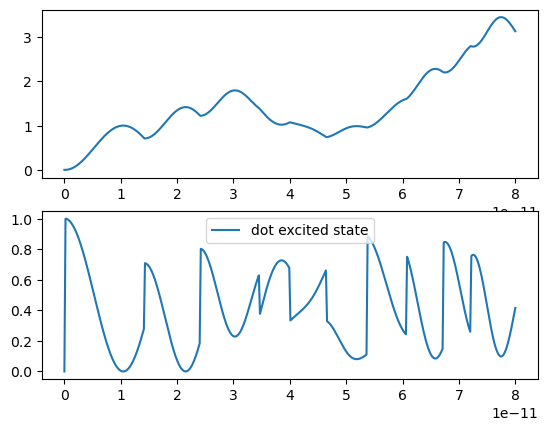

In [12]:
n_c=result.expect[0]
n_a=result.expect[1]
fig=plt.figure()
axes=fig.add_subplot(211)
line_c=axes.plot(tlist,n_c,label='cavity ')
axes=fig.add_subplot(212)
line_a=axes.plot(tlist,n_a,label='dot excited state')
plt.legend()
plt.show()

In [ ]:
opt=Options(nsteps=100000)
result1=mesolve(H,phi1,tlist,[],[],options=opt)

In [13]:
result1=qload('output for fidelity')

In [14]:
fida=result1.states
#print(fida)
fida1=[]
for i in range(0,len(tlist)):
    g=ptrace(fida[i],0)

    fidelity1=fidelity(rho1,g)
    fida1.append(fidelity1)
print(fida1[689])
k=(result1.states[732],0)
trr=[]
for i in range(0,len(fida1)):
    if fida1[i]>=0.79:
        trr.append(i)
        
print(trr)
        

0.7652902418471614
[211]


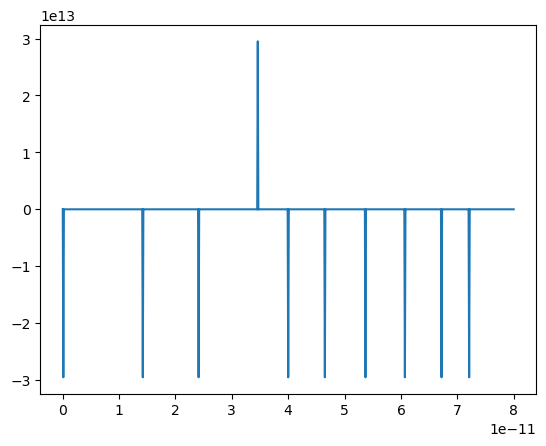

In [15]:
o=[]
for i in range(0,len(tlist)):
    g=d_drive(tlist[i],0)
    o.append(g.real)
    #print(g)
#print(o)
#print(len(tlist)
fig=plt.figure()
axes=fig.add_subplot(111)
line_c=axes.plot(tlist,o)

plt.show()   

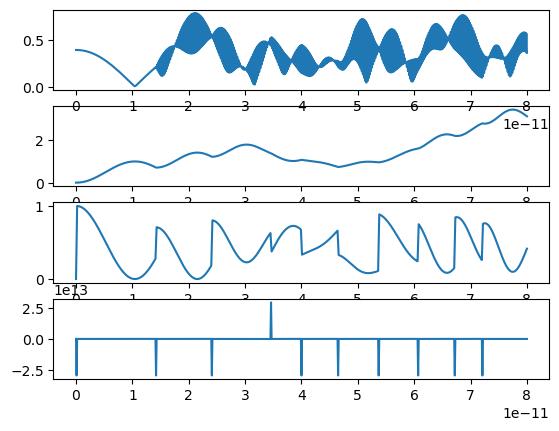

In [16]:
fig=plt.figure()
n_c=result.expect[0]
n_a=result.expect[1]
axes=fig.add_subplot(412)
line_c=axes.plot(tlist,n_c,label='cavity ')
axes=fig.add_subplot(413)
line_a=axes.plot(tlist,n_a,label='dot excited state')
axes=fig.add_subplot(411)
line_c=axes.plot(tlist,fida1,'')
axes=fig.add_subplot(414)
line_c=axes.plot(tlist,o)
plt.show()

#print(len(er))        
#print(fida1)        


In [17]:
import scipy as sc
from scipy.optimize import leastsq
tou1=3.46e-11
def funcquad(t,a,f,tau):
    return a*np.exp(t/tau)*np.cos(2*np.pi*f*t)
def residual(p,y,t):
    a,f,tau=p
    return y-funcquad(t,a,f,tau)
P0=1,w_c,tou1
P,_=leastsq(residual,P0,args=(fida1,tlist))
print(P)
Y=funcquad(tlist,*P)

ggM=[]
U=0   
while U<10:
    ggM.append(fida1[U])
    U=U+1

for i in range(10,len(tlist)):
    gg=(fida1[i-5]+fida1[i-4]+fida1[i-3]+fida1[i-2]+fida1[i-1]+fida1[i])/6
    ggM.append(gg)
print(len(tlist),len(ggM)) 
#print(ggM)
#fida1[i-10]+fida1[i-9]+fida1[i-8]+fida1[i-7]+fida1[i-6]+fida1[i-5]+fida1[i-4]+fida1[i-3]+

[5.06557357e-06 2.27788533e+15 1.00451531e-11]
801 801


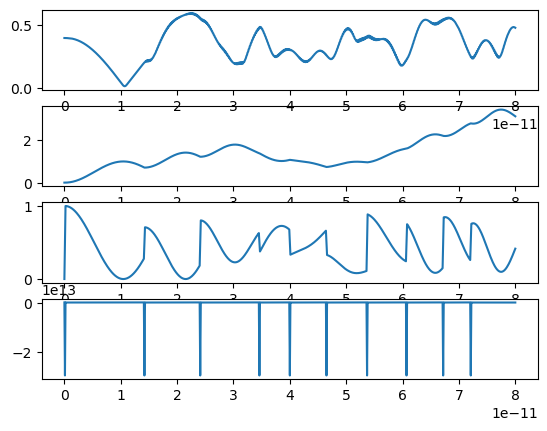

In [15]:
fig=plt.figure()
n_c=result.expect[0]
n_a=result.expect[1]
axes=fig.add_subplot(412)
line_c=axes.plot(tlist,n_c,label='cavity ')
axes=fig.add_subplot(413)
line_a=axes.plot(tlist,n_a,label='dot excited state')
axes=fig.add_subplot(411)
line_c=axes.plot(tlist,ggM,'')
axes=fig.add_subplot(414)
line_c=axes.plot(tlist,o)
plt.show()

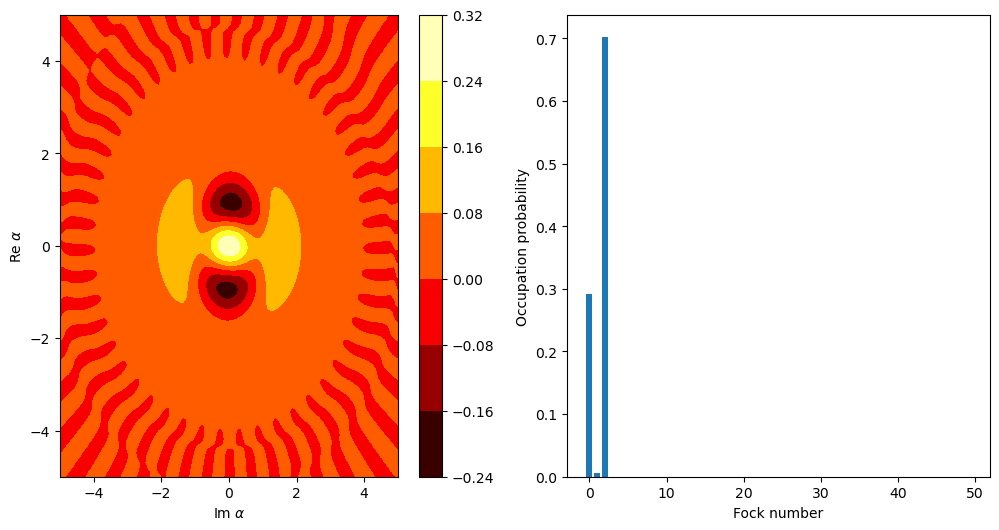

In [16]:
def wigner_plot_steadystate(rho,xvec):
    rho_cavity=ptrace(rho,0)
    W=wigner(rho_cavity,xvec,xvec)
    wlim=abs(W).max()
    fig=plt.figure(figsize=(12,6))
    axes1=fig.add_subplot(1,2,1)
    plot1=axes1.contourf(xvec,xvec,W,cmap=cm.hot)
    plt.colorbar(plot1)
    axes1.set_xlabel(r"Im $\alpha$")
    axes1.set_ylabel(r"Re $\alpha$")
    
    axes2=fig.add_subplot(1,2,2)
    plot1=axes2.bar(np.arange(N),np.real(rho_cavity.diag()))
    axes2.set_xlabel('Fock number')
    axes2.set_ylabel("Occupation probability")
    
xvec=np.linspace(-5,5,100)
wigner_plot_steadystate(result1.states[211],xvec)
